In [1]:
import shapefile
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

In [2]:
# zipcode shape data from http://gis-mclio.opendata.arcgis.com/
zip_shp = shapefile.Reader("./shape/mke_zipcode/Zip_Code_Tabulation_Areas_ZCTA")
#for rec in zip_shp.records(): print(rec)
# EMS calls for service from MKE Open Data Portal
ems = pd.read_csv('./data/mfdems.csv')

In [3]:
def plot_df_on_mke_zip_map(df):
    fig = plt.figure(figsize=(6,5))
    plt.title(df.columns[0])
    ax = plt.axes()
    ax.set_aspect('equal')

    available_data = np.array(df.index.tolist()).astype(int).astype(str)

    for i, shape in enumerate(zip_shp.shapes()):
        if zip_shp.record(i)[1] in available_data:
            R = df.pct[float(zip_shp.record(i)[1])] / max(df.pct)
            G = 0
            B = 0
        else: # if area has no occurrences
            R = 1
            G = 1
            B = 1
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=0.7, edgecolor=[0,0,0], zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)
                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=0.7, zorder=2)
                ax.add_patch(patch)

    plt.xlim(zip_shp.bbox[0],zip_shp.bbox[2])
    plt.ylim(zip_shp.bbox[1],zip_shp.bbox[3])
    plt.axis('off')
    fig.savefig('./images/EMS_' + df.columns[0] + '_2018_zipcode.png')

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


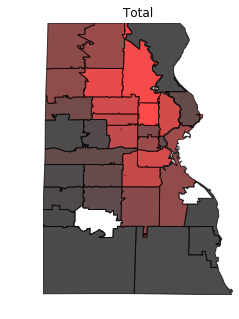

In [4]:
# MKE EMS calls - total
total = ems[['ZIP Code','Final Call for Service Type']].groupby(['ZIP Code'], as_index=True).agg(['count'])['Final Call for Service Type']
total.columns = ['Total']
total['pct'] = total['Total'] / sum(total['Total'])
plot_df_on_mke_zip_map(total)